<img src="https://raw.githubusercontent.com/sebastianVP/sebastianVP/main/toulouselautrec_logo.jpg" alt= "LOGO CAT" width=400 height=400 align = "right">

<br>
<h1><font color="#7F000E" size=5>TOULOUSE LAUTREC </font></h1>
<h1><font color="#7F000R" size=6> VISUALIZACION DE DATOS CON PYTHON </font></h1>
<h1><font color="#7F000E" size=4>
 </font></h1>
<br>
<br>
<div style="text-align:right">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3> Curso 2274, Clases LUNES y MIERCOLES 20:00-22:30pm </font><br>
<font color="#7F000e" size=3> Primera Sesion 10/07/2024 </font><br>
</div>

---

# **Docente:**

<font color="blue" size=3> Ing. Alexander Valdez</font><br>
* Link de github:  [GITHUB](https://github.com/sebastianVP)
* Link de Website: [WebSite](https://avpresume-7qretxfih6bnejjtxcvhdr.streamlit.app/)

**Quote:**

> La visualización de datos es más que simplemente crear gráficos bonitos; Es una herramienta poderosa para extraer información de conjuntos de datos complejos



## **INSTALACION DE PAQUETES**

In [ ]:
!apt-get install libnetcdf-dev libnetcdff-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libnetcdf-dev is already the newest version (1:4.8.1-1).
libnetcdf-dev set to manually installed.
Suggested packages:
  netcdf-bin netcdf-doc
The following NEW packages will be installed:
  libnetcdff-dev libnetcdff7
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 460 kB of archives.
After this operation, 1,801 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libnetcdff7 amd64 4.5.4+ds-1 [134 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libnetcdff-dev amd64 4.5.4+ds-1 [325 kB]
Fetched 460 kB in 1s (770 kB/s)
Selecting previously unselected package libnetcdff7.
(Reading database ... 121926 files and directories currently installed.)
Preparing to unpack .../libnetcdff7_4.5.4+ds-1_amd64.deb ...
Unpacking libnetcdff7 (4.5.4+ds-1) ...
Selecting previously unselected package libnetcdff-dev.
Prepari

## **LECTOR DE ARCHIVOS EN FORMATO NCDEF LIBRERIA**

In [ ]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.8 MB/s eta 0:00:00


In [ ]:
#/usr/bin/python2.7
from google.colab import drive
from google.colab import files
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import time
from datetime import datetime
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##**METODO DE LECTURA**

In [ ]:
def ncdump(nc_fid, verb=True):
    '''
    ncdump outputs dimensions, variables and their attribute information.
    The information is similar to that of NCAR's ncdump utility.
    ncdump requires a valid instance of Dataset.

    Parameters
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    verb : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print ("\t\ttype:", repr(nc_fid.variables[key].dtype))
            for ncattr in nc_fid.variables[key].ncattrs():
                print ('\t\t%s:' % ncattr,\
                      repr(nc_fid.variables[key].getncattr(ncattr)))
        except KeyError:
            print ("\t\tWARNING: %s does not contain variable attributes" % key)

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print("NetCDF Global Attributes:")
        for nc_attr in nc_attrs:
            print ('\t%s:' % nc_attr, repr(nc_fid.getncattr(nc_attr)))
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # Dimension shape information.
    if verb:
        print ("NetCDF dimension information:")
        for dim in nc_dims:
            print ("\tName:", dim)
            print ("\t\tsize:", len(nc_fid.dimensions[dim]))
            print_ncattr(dim)
    # Variable information.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if verb:
        print ("NetCDF variable information:")
        for var in nc_vars:
            if var not in nc_dims:
                print ('\tName:', var)
                print ("\t\tdimensions:", nc_fid.variables[var].dimensions)
                print ("\t\tsize:", nc_fid.variables[var].size)
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars


In [ ]:
nc_f = 'gdrive/My Drive/CURSO_RADARMETEOROLOGICO/DATA/DatosMIRA35CNETCDF.mmclx'
nc_fid = Dataset(nc_f, 'r')
#print(nc_fid)
print("")
print("")
print("")
nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)

time_v  = nc_fid.variables['time'][:]#+18000
print(time_v[0],time_v[1])
azi   = nc_fid.variables['azi'][:]
elv  = nc_fid.variables['elv'][:]
rango = nc_fid.variables['range'][:]
drg  = nc_fid.variables['drg'][:]
Ze   = nc_fid.variables['Ze'][:]
Zg   = nc_fid.variables['Zg'][:]
Z   = nc_fid.variables['Z'][:]



VELg  = nc_fid.variables['VELg'][:]
RMSg  = nc_fid.variables['RMSg'][:]
LDRg   = nc_fid.variables['LDRg'][:]






NetCDF Global Attributes:
	convention: 'CF-1.0'
	location: 'Huancayo'
	Altitude: '3323 m'
	Latitude: '-12.040268'
	Longitude: '-75.320959'
	system: 'MIRA36'
	title: 'MIRA-36 Cloud Radar Data'
	institution: 'METEK'
	source: '160404_195956.pds.off'
	reference: 'Ka Band Cloud Radar MIRA-36, METEK GmbH www.metek.de'
	ppar: 'PRF:        4808\nPDR:         208\nSFT:         128\nAVC:         200\nIHP:           5\nCHG:         417\nPOL:         208\nATT:        1500\nTX:           0\nADCGAIN0:      0.00000\nADCGAIN1:      0.00000\nWND:           0\nPOS:         224\nADD:          35\nLEN:           0\nCAL:         208\nNOS:           0\nOF0:          50\nOF1:           0\nSWT:           0\nSUM:           0\nOSC:           0\nTST:           0\nCOR:           1\nOFS:           0\nHSBN:           1\nHSBA:           1\nCALIBRPOWER_M:      1.00000\nCALIBRSNR_M:      281.838\nCALIBRPOWER_S:      1.00000\nCALIBRSNR_S:      234.423\nRAW_GATE1:           5\nRAW_GATE2:         420\nRAW:           0

## **PRIMER GRAFICO - ALTURA VS REFLECTIVIDAD**

time_v 1969
azi [-100. -100. -100. ... -100. -100. -100.]
elv [90. 90. 90. ... 90. 90. 90.]
rango (415,)
drg 31.1792


<ipython-input-9-392c8f2c1481>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*" (-> color='r'). The keyword argument will take precedence.
  plt.plot(Ze_dB,rango,'r*',color='blue',linestyle='--',markerfacecolor='w')


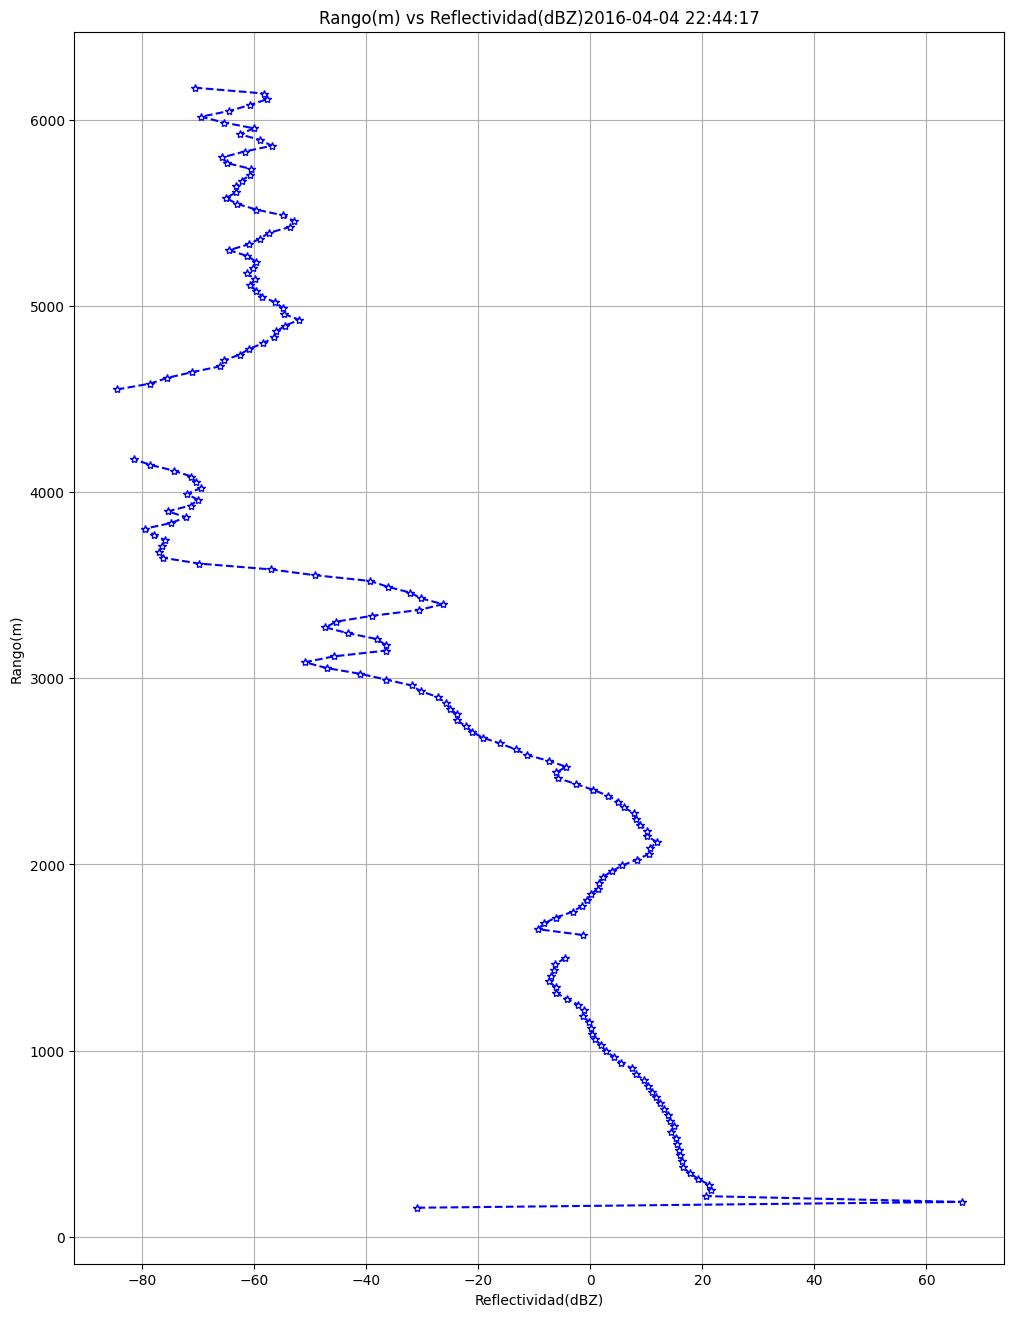

In [ ]:
print("time_v",len(time_v))
print("azi",azi)
print("elv",elv)
print("rango",rango.shape)
print("drg",drg)
#print("Ze",Ze.shape,10*np.log(Ze[300]))
index=1800
Ze_dB= 10*np.log(Ze[index])
timedate = datetime.fromtimestamp(time_v[index])
plt.figure(figsize=(12,16))
plt.title('Rango(m) vs Reflectividad(dBZ)'+str(timedate))
plt.ylabel("Rango(m)")
plt.xlabel("Reflectividad(dBZ)")

plt.plot(Ze_dB,rango,'r*',color='blue',linestyle='--',markerfacecolor='w')
plt.grid(True)
plt.show()



---

## **GRAFICO DINAMICO**

In [ ]:
%matplotlib inline
# GRAFICO DINAMICO

def reflectividad(i=1968):
      timedate = datetime.fromtimestamp(time_v[i])
     #print(timedate)
      plt.figure(figsize=(4,6))
      plt.title('Rango(m) vs Reflectividad(dBZ) ' + str(timedate) )
      plt.ylabel("Rango(m)")
      plt.xlabel("Reflectividad(dBZ)")
      Ze_dB= 10*np.log(Ze[i])
      plt.axis([np.nanmin(Ze_dB), np.nanmax(Ze_dB), min(rango), 9000])
      plt.plot(Ze_dB,rango,'r*',color='blue',linestyle='--',markerfacecolor='w')
      plt.grid(True)
      plt.show()
from ipywidgets import interact
interact(reflectividad,i = (1, 1968, 1),)
None

interactive(children=(IntSlider(value=1968, description='i', max=1968, min=1), Output()), _dom_classes=('widge…

In [ ]:
# GRAFICO RTI
date_0 = datetime.strptime(time.ctime(time_v[0]),'%a %b %d %H:%M:%S %Y')
t0 = date_0.hour+date_0.minute/60.0
date_1 = datetime.strptime(time.ctime(time_v[-1]),'%a %b %d %H:%M:%S %Y')
t1 = date_1.hour+date_1.minute/60.0
h0= rango[0]
h1= len(rango)*drg
y=8000

<ipython-input-12-a094204aa3d4>:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.transpose(10*np.log10(Zg[:,:int(len(rango)*(y/h1))])), cmap=plt.cm.jet, aspect='auto',vmin=-60.0,vmax=40.0,origin='lower',extent=[t0,t1,h0,y])


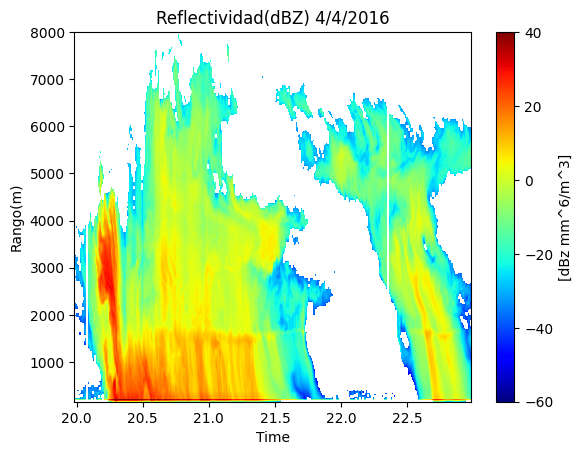

In [ ]:
#REFLECTIVIDAD
plt.imshow(np.transpose(10*np.log10(Zg[:,:int(len(rango)*(y/h1))])), cmap=plt.cm.jet, aspect='auto',vmin=-60.0,vmax=40.0,origin='lower',extent=[t0,t1,h0,y])
plt.ylabel("Rango(m)")
plt.xlabel("Time")
plt.title('Reflectividad(dBZ) ' + str(date_0.day)+ '/'+str(date_0.month) + '/'+str(date_0.year))
cbar=plt.colorbar()
cbar.set_label(label='[dBz mm^6/m^3]')
plt.show()

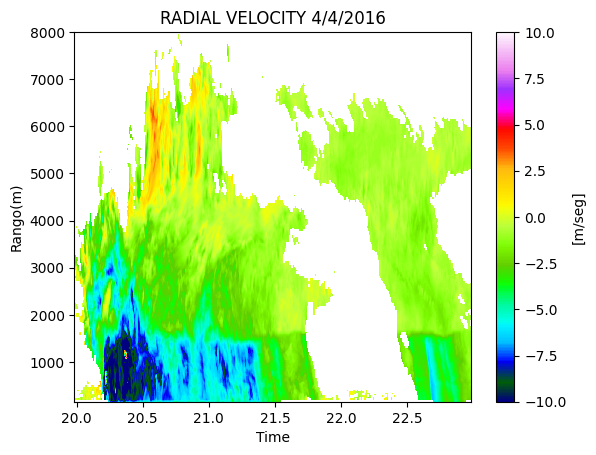

In [ ]:
#VELOCITY
plt.imshow(np.transpose(VELg[:,:int(len(rango)*(y/h1))]), cmap=plt.cm.gist_ncar, aspect='auto',vmin=-10.0,vmax=10.0,origin='lower',extent=[t0,t1,h0,y])
plt.ylabel("Rango(m)")
plt.xlabel("Time")
plt.title('RADIAL VELOCITY ' + str(date_0.day)+ '/'+str(date_0.month) + '/'+str(date_0.year))
cbar=plt.colorbar()
cbar.set_label(label='[m/seg]')
plt.show()

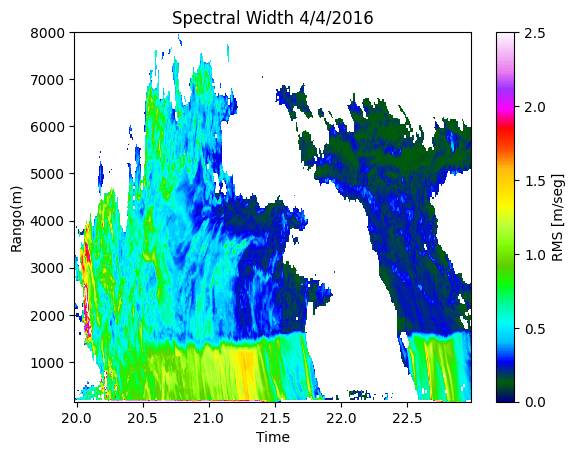

In [ ]:
#SPECTRAL WIDTH
plt.imshow(np.transpose(RMSg[:,:int(len(rango)*(y/h1))]), cmap=plt.cm.gist_ncar, aspect='auto',vmin=0.0,vmax=2.5,origin='lower',extent=[t0,t1,h0,y])
plt.ylabel("Rango(m)")
plt.xlabel("Time")
plt.title('Spectral Width ' + str(date_0.day)+ '/'+str(date_0.month) + '/'+str(date_0.year))
cbar=plt.colorbar()
cbar.set_label(label='RMS [m/seg]')
plt.show()


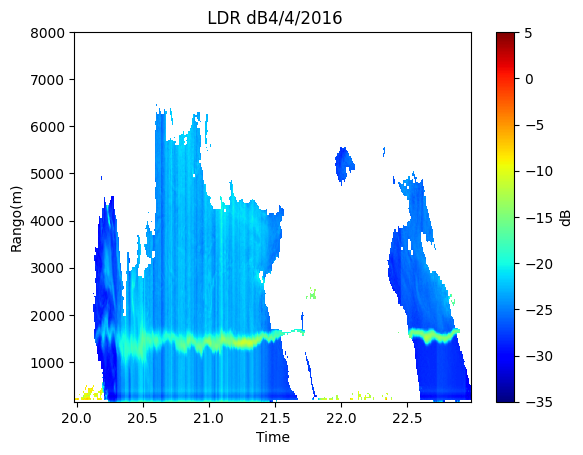

In [ ]:
# LDR RAZON DE DEPOLARIZACION
plt.imshow(np.transpose(10*np.log10(LDRg[:,:int(len(rango)*(y/h1))])), cmap=plt.cm.jet, aspect='auto',vmin=-35,vmax=5,origin='lower',extent=[t0,t1,h0,y])
plt.ylabel("Rango(m)")
plt.xlabel("Time")
plt.title(' LDR dB' + str(date_0.day)+ '/'+str(date_0.month) + '/'+str(date_0.year))
cbar=plt.colorbar()
cbar.set_label(label='dB')
plt.show()